In [17]:
# Cell 1: Load and explore data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [18]:
df=pd.read_csv('../data/train.csv')
df.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [19]:
df.columns=['ID','Date','StoreID','Product_Type','Sales','On_Promotion']
df.head()

,ID,Date,StoreID,Product_Type,Sales,On_Promotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [21]:
df['Date'].nunique()

1684

In [4]:
# Basic exploration
print(f"Shape: {df.shape}")
print(f"Date range: {df['Date'].min()} to {df['Date'].max()}")
print(f"Stores: {df['StoreID'].nunique()}")
print(f"Product families: {df['Product_Type'].nunique()}")

Shape: (3000888, 6)
Date range: 2013-01-01 to 2017-08-15
Stores: 54
Product families: 33


In [5]:
df.isnull().sum()

ID              0
Date            0
StoreID         0
Product_Type    0
Sales           0
On_Promotion    0
dtype: int64

In [6]:
# convert date column to datetime
df['Date']=pd.to_datetime(df['Date'])
df

,ID,Date,StoreID,Product_Type,Sales,On_Promotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [7]:
# Aggregate to daily sales 
daily= df.groupby('Date')['Sales'].sum().reset_index()

In [8]:
daily

,Date,Sales
0,2013-01-01,2511.618999
1,2013-01-02,496092.417944
2,2013-01-03,361461.231124
3,2013-01-04,354459.677093
4,2013-01-05,477350.121229
...,...,...
1679,2017-08-11,826373.722022
1680,2017-08-12,792630.535079
1681,2017-08-13,865639.677471
1682,2017-08-14,760922.406081


(array([15340., 15706., 16071., 16436., 16801., 17167.]),
 [Text(15340.0, 0, '2012'),
  Text(15706.0, 0, '2013'),
  Text(16071.0, 0, '2014'),
  Text(16436.0, 0, '2015'),
  Text(16801.0, 0, '2016'),
  Text(17167.0, 0, '2017')])

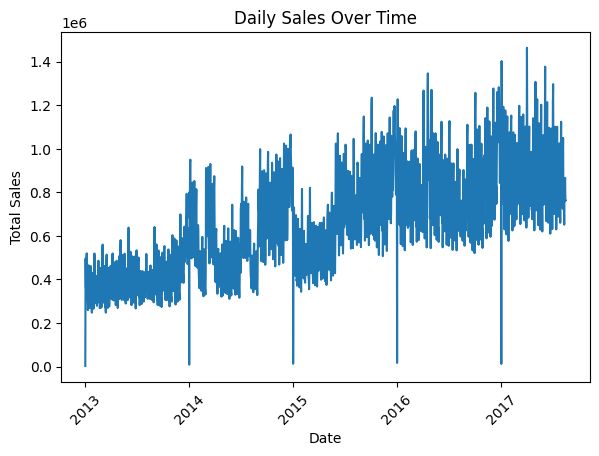

In [10]:
plt.figure(figsize=(15, 10))

# Time series plot
plt.subplot(2, 2, 1)
plt.plot(daily['Date'], daily['Sales'])
plt.title('Daily Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)

Text(0, 0.5, 'Frequency')

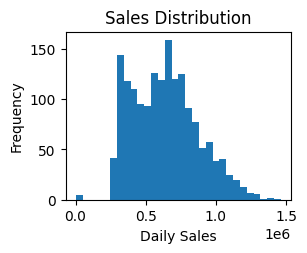

In [12]:
# Distribution
plt.subplot(2, 2, 2)
plt.hist(daily['Sales'], bins=30)
plt.title('Sales Distribution')
plt.xlabel('Daily Sales')
plt.ylabel('Frequency')

In [14]:
# Day of week pattern
daily['dayofweek'] = daily['Date'].dt.dayofweek
weekly_pattern = daily.groupby('dayofweek')['Sales'].mean()

([<matplotlib.axis.XTick at 0x24eb4dd0d00>,
 [Text(0, 0, 'Mon'),
  Text(1, 0, 'Tue'),
  Text(2, 0, 'Wed'),
  Text(3, 0, 'Thu'),
  Text(4, 0, 'Fri'),
  Text(5, 0, 'Sat'),
  Text(6, 0, 'Sun')])

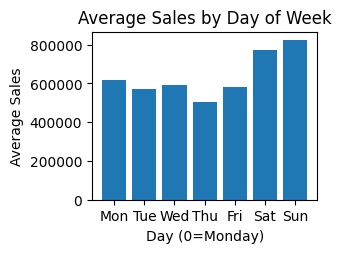

In [15]:
plt.subplot(2, 2, 3)
plt.bar(range(7), weekly_pattern)
plt.title('Average Sales by Day of Week')
plt.xlabel('Day (0=Monday)')
plt.ylabel('Average Sales')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

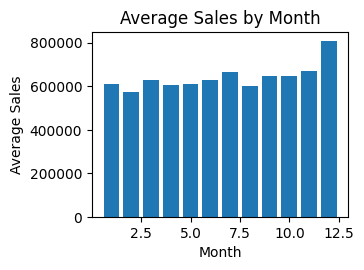

In [16]:
# Monthly pattern
daily['month'] = daily['Date'].dt.month
monthly_pattern = daily.groupby('month')['Sales'].mean()

plt.subplot(2, 2, 4)
plt.bar(monthly_pattern.index, monthly_pattern.values)
plt.title('Average Sales by Month')
plt.xlabel('Month')
plt.ylabel('Average Sales')

plt.tight_layout()
plt.show()

In [15]:
daily.to_csv('../data/daily_sales.csv',index=False)
